# Analyzing Movie Reviews

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


In [ ]:
movies=pd.read_csv('C:/Users/dasarr/Downloads/DDDD/DDDD/data-master/data-master/fandango/fandango_score_comparison.csv')
movies[0:10]

In [3]:
movies.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

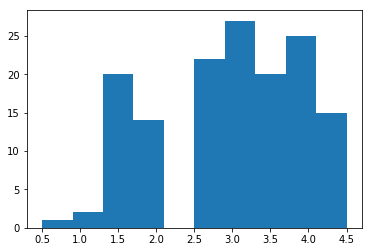

In [4]:
plt.hist(movies['Metacritic_norm_round'])

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

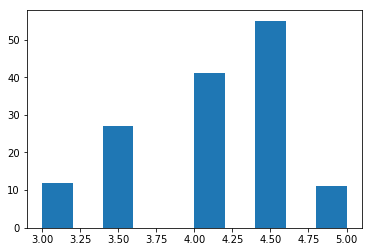

In [5]:
plt.hist(movies['Fandango_Stars'])

## Fandango vs Metacritic Scores

There are no scores below a 3.0 in the Fandango reviews. The Fandango reviews also tend to center around 4.5 and 4.0, whereas the Metacritic reviews seem to center around 3.0 and 3.5.


In [6]:

f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()
f_std = movies["Fandango_Stars"].std()
m_std = movies["Metacritic_norm_round"].std()
f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()

print(f_mean)
print(m_mean)
print(f_std)
print(m_std)
print(f_median)
print(m_median)

4.08904109589
2.97260273973
0.540385977979
0.990960561374
4.0
3.0


## Fandango vs Metacritic number differences

The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.

Fandango ratings in general appear to be higher than metacritic ratings.

These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.


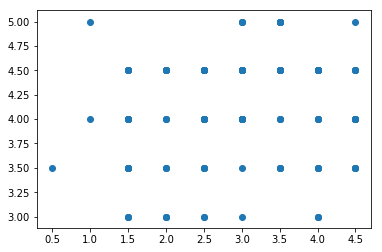

In [7]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [8]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])
movies.sort_values(by="fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


## Fandango and Metacritic correlation

The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.


In [9]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

r_value

0.17844919073895918

In [10]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [11]:
pred = 3 * slope + intercept
pred

4.0917071528212041

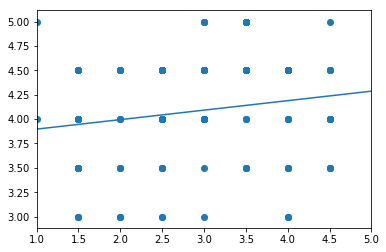

In [12]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()